# go 项目规范

## 目录结构
https://github.com/golang-standards/project-layout/blob/master/README_zh.md

## JSON 序列化

### unmarshal (string 转为 struct)

In [4]:
// omitempty，转成字符串时零值忽略
import (
	"encoding/json"
	"fmt"
	"os"
)

type Dummy struct {
	Name    string  `json:"name,omitempty"`
	Number  int64   `json:"number,omitempty"`
	Pointer *string `json:"pointer,omitempty"`
}

func main() {
	pointer := "yes"

	dummyComplete := Dummy{
		Name:    "Mr Dummy",
		Number:  4,
		Pointer: &pointer,
	}

	data,
		err := json.Marshal(dummyComplete)
	if err != nil {
		fmt.Println("An error occured: %v", err)
		os.Exit(1)
	}

	fmt.Println(string(data))

	// ALL of those are considered empty by Go
	dummyNilPointer := Dummy{
		Name:    "",
		Number:  0,
		Pointer: nil,
	}

	dataNil,
		err := json.Marshal(dummyNilPointer)
	if err != nil {
		fmt.Println("An error occured: %v", err)
		os.Exit(1)
	}

	fmt.Println(string(dataNil))

}


{"name":"Mr Dummy","number":4,"pointer":"yes"}
{}


In [7]:
// json中有，而结构体中没有的字段，转换时会忽略
import (
	"encoding/json"
	"fmt"
	"os"
)

// let's change the struct:
type Dummy struct {
	// we only care about the name now
	Name string `json:"name"`
	// all other fields are gone
}

func main() {
	data := []byte(`
            {
                "name": "Mr Dummy",
                "number": 4,
                "pointer": "yes"
            }
        `)
	var dummy Dummy
	err := json.Unmarshal(data, &dummy)
	if err != nil {
		fmt.Println("An error occured: %v", err)
		os.Exit(1)
	}

	// we want to print the field names as well
	fmt.Printf("%+v\n", dummy)
}


{Name:Mr Dummy}


In [5]:
import (
	"encoding/json"
	"fmt"
	"os"
)

type Dummy struct {
	Name    string  `json:"name"`
	Number  int64   `json:"number"`
	Pointer *string `json:"-"` // we want to ignore JSON for this one
}

func main() {
	data := []byte(`
            {
                "name": "Mr Dummy",
                "number": 4,
                "pointer": "yes"
            }
        `)

	var dummy Dummy
	err := json.Unmarshal(data, &dummy)
	if err != nil {
		fmt.Println("An error occured: %v", err)
		os.Exit(1)
	}

	// we want to print the field names as well
	fmt.Printf("%+v\n", dummy)
}


{Name:Mr Dummy Number:4 Pointer:<nil>}


### marshal (struct 转为 string)

In [8]:
// - 忽略某个字段
import (
	"encoding/json"
	"fmt"
	"os"
)

type Dummy struct {
	Name    string  `json:"name"`
	Number  int64   `json:"number"`
	Pointer *string `json:"-"`
}

func main() {
	pointer := "yes"

	dummy := Dummy{
		Name:    "Mr Dummy",
		Number:  4,
		Pointer: &pointer,
	}

	data, err := json.Marshal(dummy)
	if err != nil {
		fmt.Println("An error occured: %v", err)
		os.Exit(1)
	}

	fmt.Println(string(data))
}


{"name":"Mr Dummy","number":4}


In [12]:
// omitempty，转成字符串时零值忽略
import (
	"encoding/json"
	"fmt"
	"os"
)

type Dummy struct {
	Name    string  `json:"name,omitempty"`
	Number  int64   `json:"number,omitempty"`
	Pointer *string `json:"pointer,omitempty"`
}

func main() {
	pointer := "yes"

	dummyComplete := Dummy{
		Name:    "Mr Dummy",
		Number:  4,
		Pointer: &pointer,
	}

	data, err := json.Marshal(dummyComplete)
	if err != nil {
		fmt.Println("An error occured: %v", err)
		os.Exit(1)
	}

	fmt.Println(string(data))

	// ALL of those are considered empty by Go
	dummyNilPointer := Dummy{
		Name:    "",
		Number:  0,
		Pointer: nil,
	}
	dataNil, err := json.Marshal(dummyNilPointer)
	if err != nil {
		fmt.Println("An error occured: %v", err)
		os.Exit(1)
	}

	fmt.Println(string(dataNil))
}


{"name":"Mr Dummy","number":4,"pointer":"yes"}
{}


## 文档

1. 文档中的Types章节，为什么有的方法只是函数，但是却和类型关联？

<div>
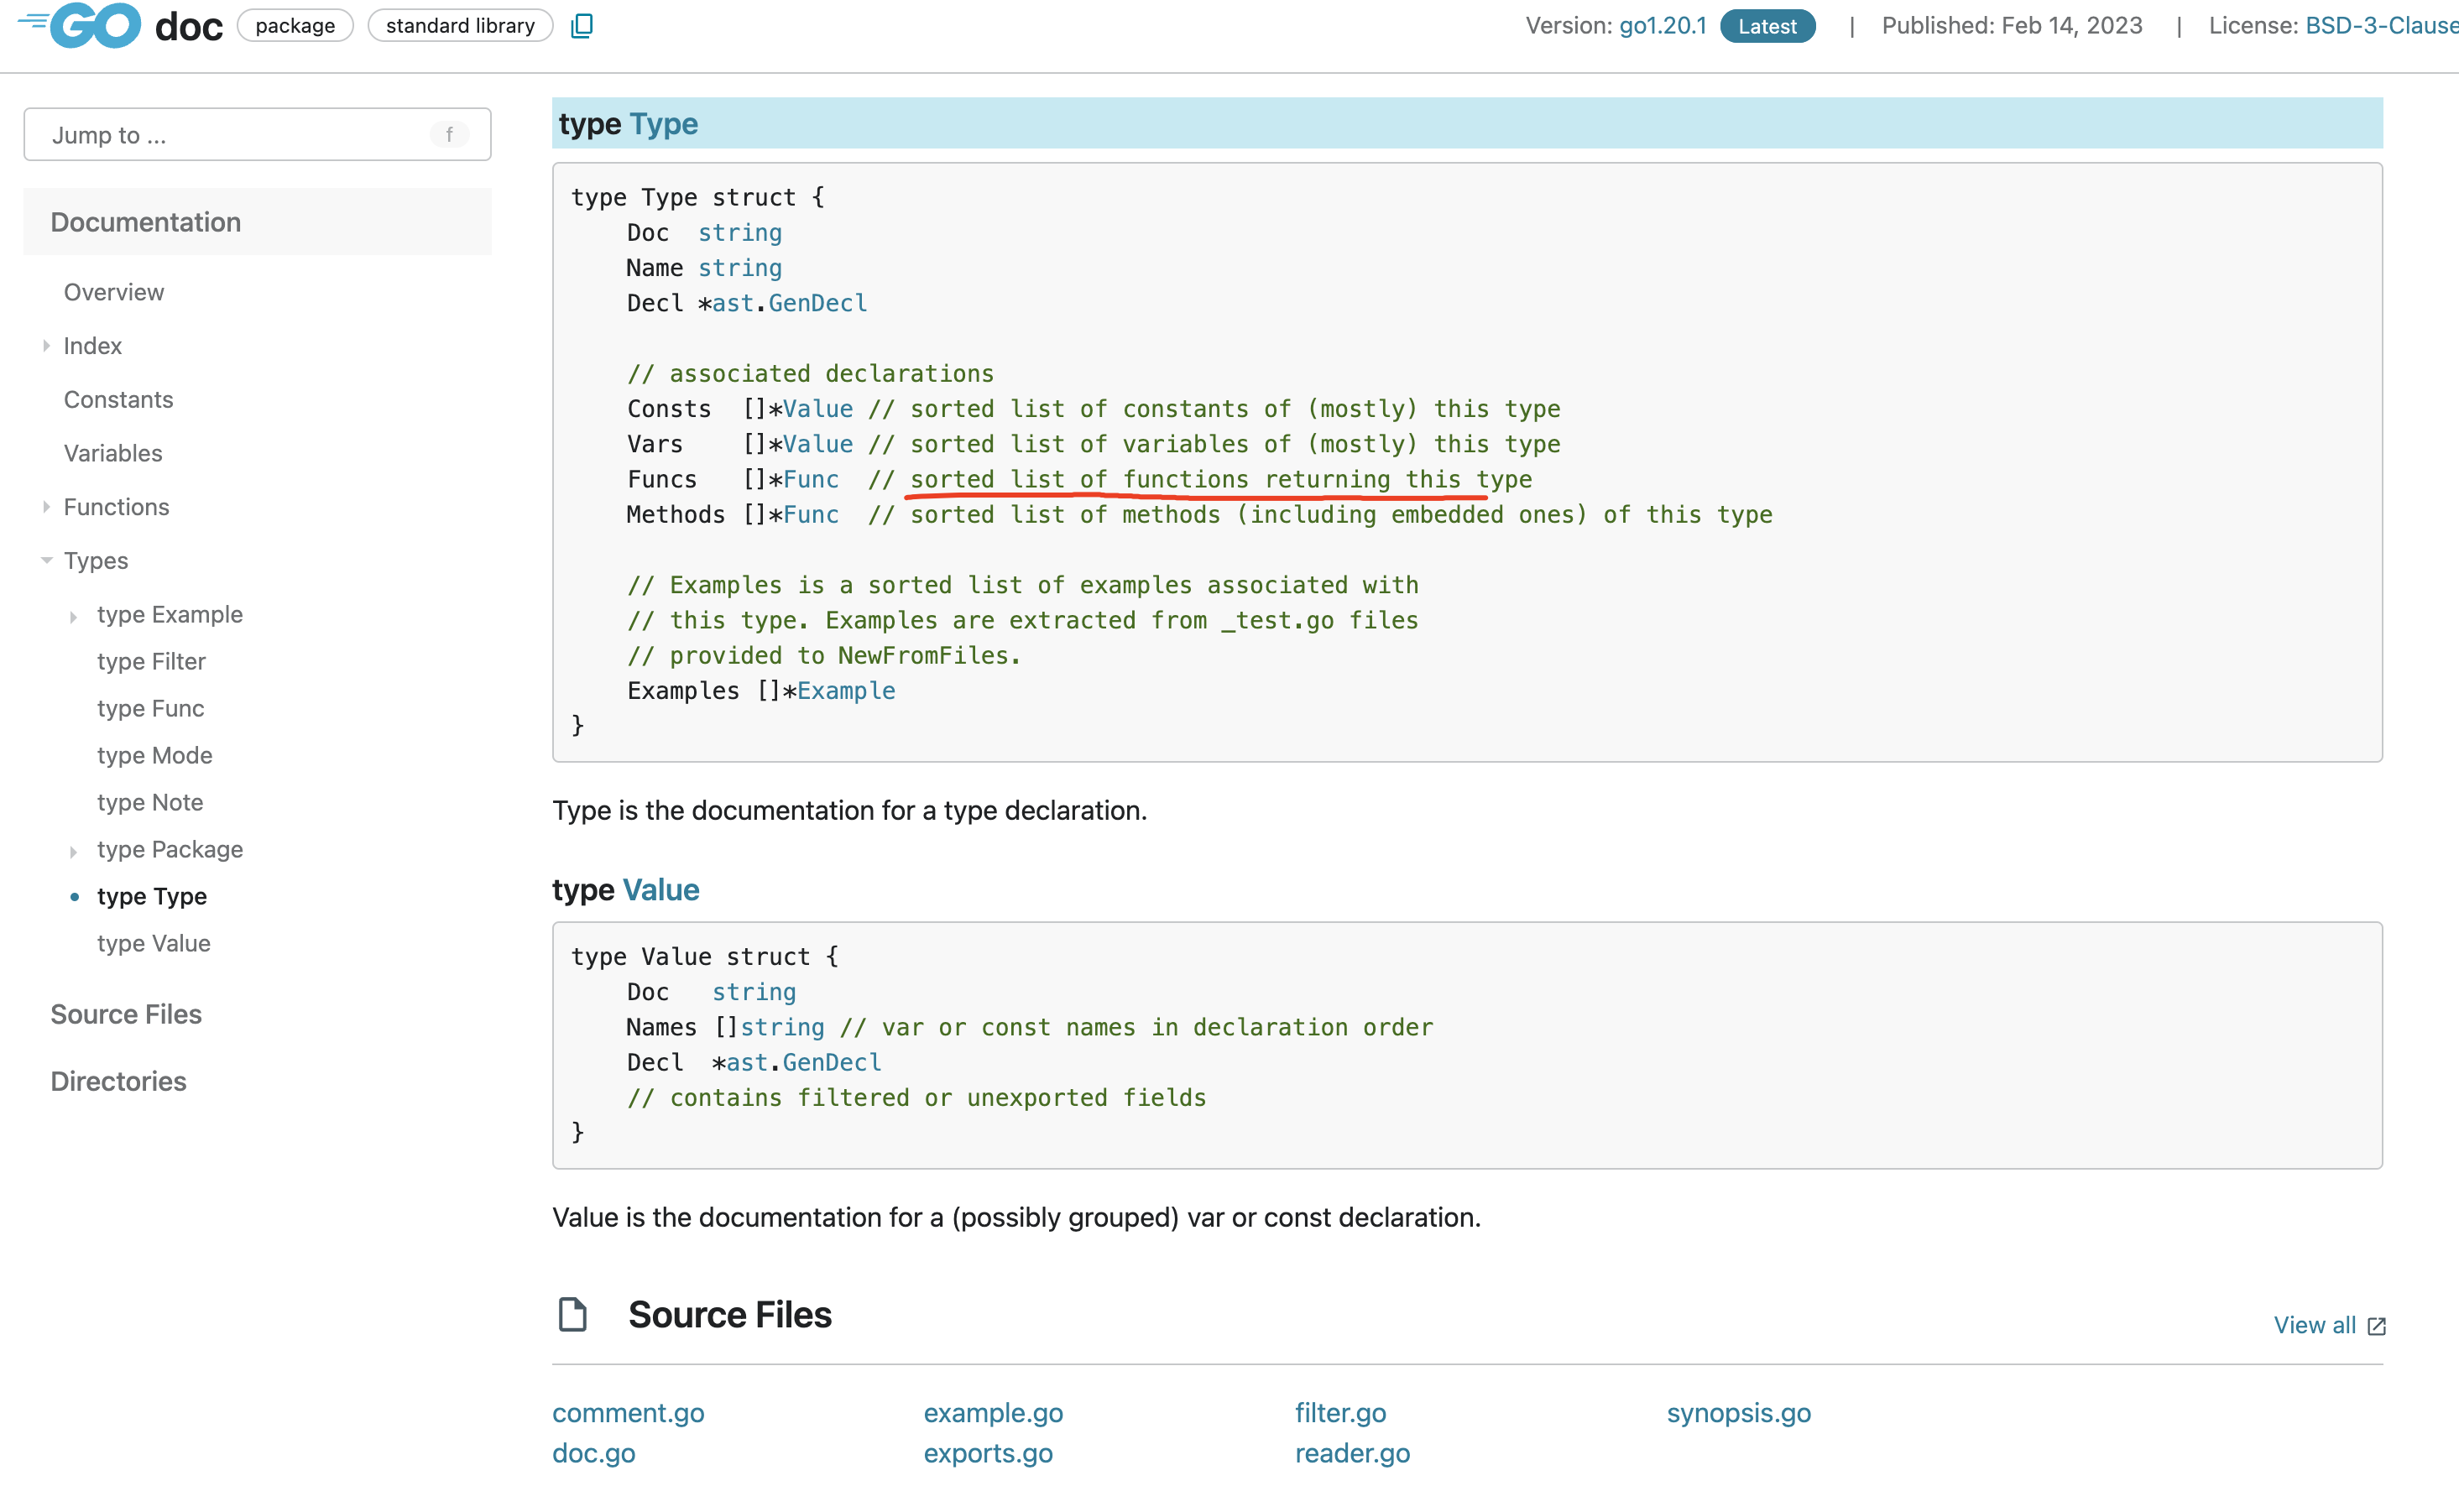
</div>



In [2]:

func main() {
    // src and test are two source files that make up
    // a package whose documentation will be computed.
    const src = `
// This is the package comment.
package p

import "fmt"

// This comment is associated with the Greet function.
func Greet(who string) {
    fmt.Printf("Hello, %s!\n", who)
}
`
    const test = `
package p_test

// This comment is associated with the ExampleGreet_world example.
func ExampleGreet_world() {
    Greet("world")
}
`

    // Create the AST by parsing src and test.
    fset := token.NewFileSet()
    files := []*ast.File{
        mustParse(fset, "src.go", src),
        mustParse(fset, "src_test.go", test),
    }

    // Compute package documentation with examples.
    p, err := doc.NewFromFiles(fset, files, "example.com/p")
    if err != nil {
        panic(err)
    }

    fmt.Printf("package %s - %s", p.Name, p.Doc)
    fmt.Printf("func %s - %s", p.Funcs[0].Name, p.Funcs[0].Doc)
    fmt.Printf(" ⤷ example with suffix %q - %s", p.Funcs[0].Examples[0].Suffix, p.Funcs[0].Examples[0].Doc)

}

func mustParse(fset *token.FileSet, filename, src string) *ast.File {
    f, err := parser.ParseFile(fset, filename, src, parser.ParseComments)
    if err != nil {
        panic(err)
    }
    return f
}

package p - This is the package comment.
func Greet - This comment is associated with the Greet function.
 ⤷ example with suffix "world" - This comment is associated with the ExampleGreet_world example.
